1. Importing the Dependencies

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

2. Data Collection, Preprocessing and Analysis

In [2]:
car_dataset = pd.read_csv('/content/drive/MyDrive/MLDataset/car_data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
# Encoding the categorical data

car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
x = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_dataset['Selling_Price']

In [11]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
# Splitting the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

3. Model Training and Evaluation



  1. Linear Regression Model

In [14]:
linear_reg_model = LinearRegression()

In [15]:
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [16]:
training_data_prediction = linear_reg_model.predict(x_train)

In [17]:
# R Squared Error

error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8799451660493711


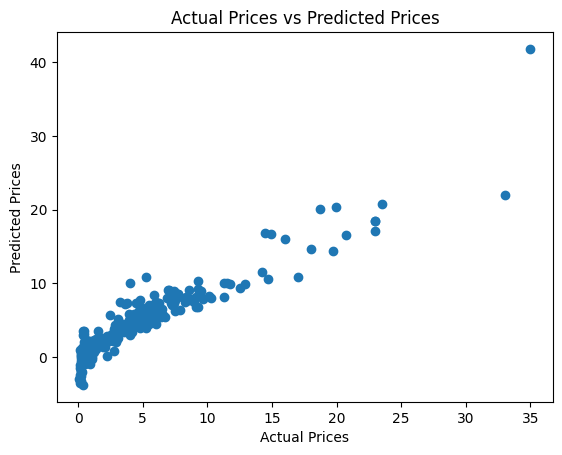

In [18]:
# Visualize the actual prices and predicted prices

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [19]:
test_data_prediction = linear_reg_model.predict(x_test)

In [20]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8365766715027051


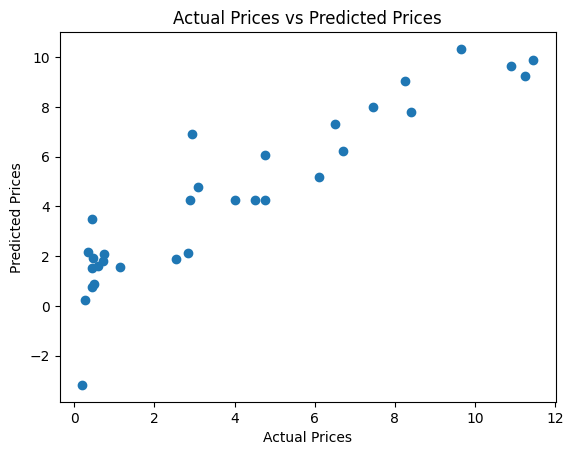

In [21]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression Model

In [22]:
lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(x_train, y_train)

Lasso()

In [24]:
training_data_prediction = lass_reg_model.predict(x_train)

In [25]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8427856123435794


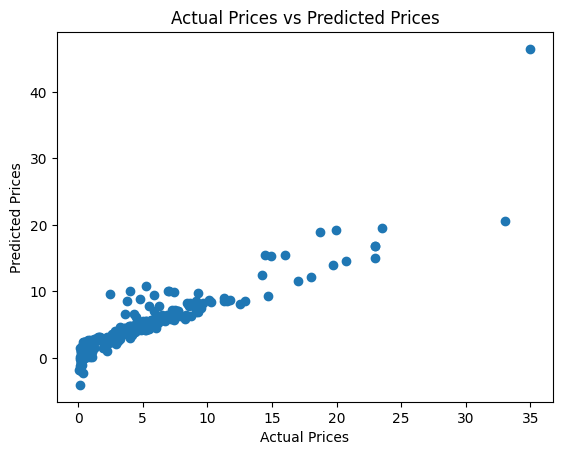

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [27]:
test_data_prediction = lass_reg_model.predict(x_test)

In [28]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8709167941173195


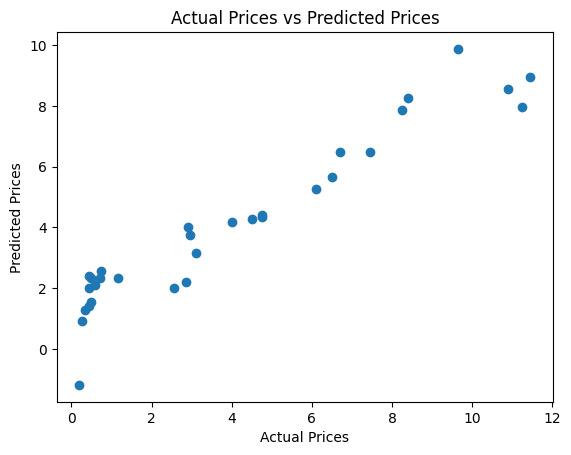

In [29]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

3. Ridge Regression Model

In [32]:
ridge_reg_model = Ridge()

In [33]:
ridge_reg_model.fit(x_train, y_train)

Ridge()

In [34]:
training_data_prediction = ridge_reg_model.predict(x_train)

In [35]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8799138947708274


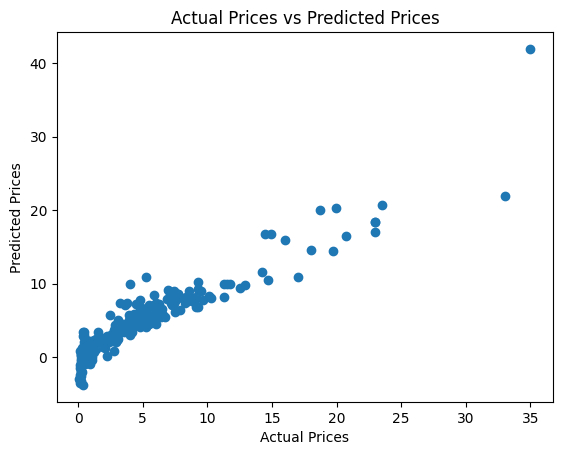

In [36]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [37]:
test_data_prediction = ridge_reg_model.predict(x_test)

In [38]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error: ", error_score)

R Squared Error:  0.8400976059753145


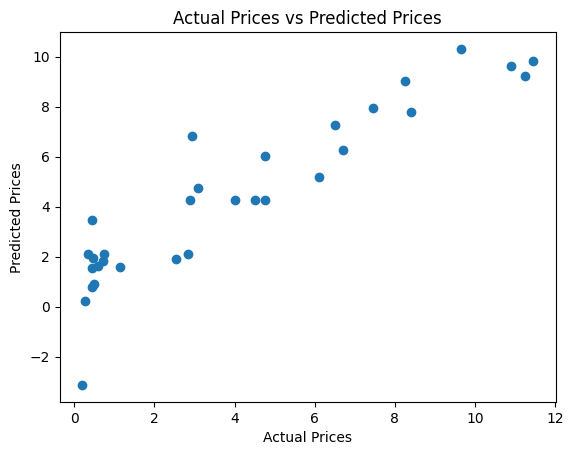

In [39]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Conclusion:

The primary goal is to have good performance on unseen data (testing data), the Lasso model seems to perform the best in this case. It has the highest R-squared value for the testing data, indicating better predictive performance compared to the other models. Therefore, based on the obtained R-squared error values, the Lasso model performed better for this car price prediction task.